In [2]:
import pandas as pd

In [3]:
import os
import numpy as np
import pandas as pd

In [4]:
%matplotlib inline
pd.set_option("max_rows", 10)
np.set_printoptions(suppress=True)

In [5]:
from seaborn import set_style
set_style("darkgrid")
import seaborn as sns
import matplotlib.pyplot as plt


In [156]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## Reading Data

In [25]:
train_data = pd.read_csv('C:/Users/Brian/Downloads/train.csv', index_col='PassengerId')
test_data = pd.read_csv('C:/Users/Brian/Downloads/test.csv', index_col='PassengerId')

## Explore Data

In [55]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [57]:
train_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
           ... 
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
Length: 11, dtype: int64

In [58]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [59]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [60]:
numeric_features = ['Age', 'Fare']

In [61]:
ordinal_features = ['Pclass', 'SibSp', 'Parch']

In [62]:
nominal_features = ['Sex', 'Embarked']

In [63]:
train_data['target_name'] = train_data['Survived'].map({0: 'Not Survived', 1: 'Survived'})

## Correlation between features (variables)

In [64]:
cor_matrix = train_data[numeric_features + ordinal_features + ['Survived']].corr().round(2)

In [65]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)


NameError: name 'train_df' is not defined

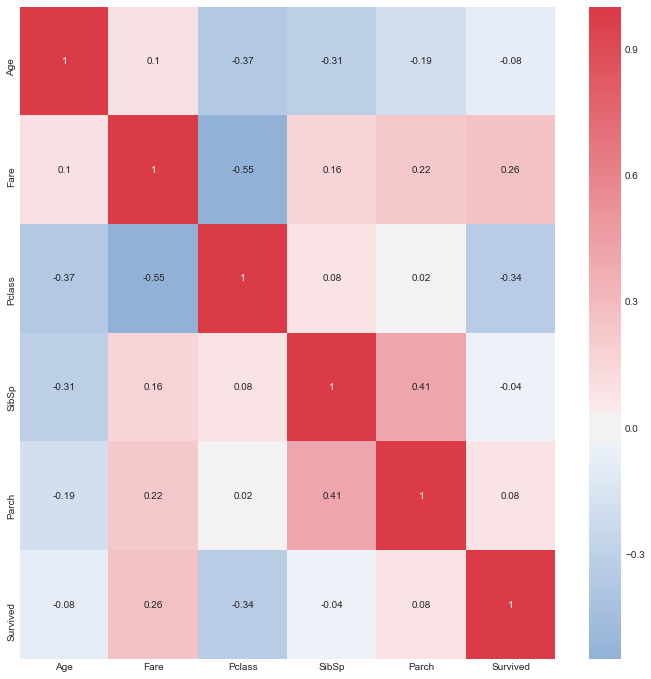

In [66]:
fig = plt.figure(figsize=(12,12));
sns.heatmap(cor_matrix, annot=True, center=0, cmap = sns.diverging_palette(250, 10, as_cmap=True), ax=plt.subplot(111));
plt.show()

In [67]:
train_data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [68]:
train_data[["Fare", "Survived"]].groupby(['Fare'], as_index=False).mean().sort_values(by='Fare', ascending=False)

,Fare,Survived
247,512.3292,1.000000
246,263.0000,0.500000
245,262.3750,1.000000
244,247.5208,0.500000
243,227.5250,0.750000
...,...,...
4,6.4375,0.000000
3,6.2375,0.000000
2,5.0000,0.000000
1,4.0125,0.000000


In [69]:
dta.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            882, 883, 884, 885, 886, 887, 888, 889, 890, 891],
           dtype='int64', name='PassengerId', length=891)

In [70]:
train_data[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [71]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,target_name
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Not Survived
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Survived
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Survived
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Survived
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Not Survived


In [39]:
train_data[["Cabin", "Survived"]].groupby(['Cabin'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Cabin,Survived
73,C62 C64,1.0
97,D21,1.0
94,D17,1.0
95,D19,1.0
60,C148,1.0
...,...,...
67,C46,0.0
64,C30,0.0
59,C128,0.0
56,C124,0.0


In [ ]:
train_data[["Cabin", "Survived"]].groupby(['Cabin'], as_index=False).mean().sort_values(by='Survived', ascending=False)

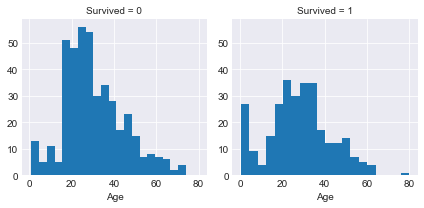

In [40]:
g = sns.FacetGrid(train_data, col='Survived')
g.map(plt.hist, 'Age', bins=20)

In [43]:
train_data[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


### Columns

## Wrangle Data

In [121]:
train_data = pd.read_csv('C:/Users/Brian/Downloads/train.csv', index_col='PassengerId')
test_data = pd.read_csv('C:/Users/Brian/Downloads/test.csv')

In [122]:
train_data.head()
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [123]:
train_data = train_data.drop(['Name', 'Cabin'], axis=1)
test_data = test_data.drop(['Name', 'Cabin'], axis=1)

In [124]:
train_data['AgeBand'] = pd.cut(train_data['Age'], 5)
train_data[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.369942
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [129]:
test_data['AgeBand'] = pd.cut(test_data['Age'], 5)

In [130]:
train_data['FareBand'] = pd.cut(train_data['Fare'], 4)
train_data[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)
test_data['FareBand'] = pd.cut(test_data['Fare'], 4)


In [131]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeBand,FareBand
PassengerId,,,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,"(16.336, 32.252]","(-0.512, 128.082]"
2,1,1,female,38.0,1,0,PC 17599,71.2833,C,"(32.252, 48.168]","(-0.512, 128.082]"
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,"(16.336, 32.252]","(-0.512, 128.082]"
4,1,1,female,35.0,1,0,113803,53.1000,S,"(32.252, 48.168]","(-0.512, 128.082]"
5,0,3,male,35.0,0,0,373450,8.0500,S,"(32.252, 48.168]","(-0.512, 128.082]"


In [133]:
train_data['AgeBand'] = train_data['AgeBand'].astype(object)
train_data['AgeBand'] = train_data['AgeBand'].astype(object)
test_data['AgeBand'] = test_data['AgeBand'].astype(object)
test_data['AgeBand'] =test_data['AgeBand'].astype(object)

In [135]:
train_data['Survived'] = train_data['Survived'].astype(object)


In [136]:
train_data['FareBand'] = train_data['FareBand'].astype(object)
test_data['FareBand'] = test_data['FareBand'].astype(object)

In [137]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null object
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    889 non-null object
AgeBand     714 non-null object
FareBand    891 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 123.5+ KB


In [139]:
# limit to categorical data using df.select_dtypes()
train_data = train_data.select_dtypes(include=[object])
test_data = test_data.select_dtypes(include=[object])
train_data.head(3)
test_data.head(3)

,Sex,Ticket,Embarked,AgeBand,FareBand
0,male,330911,Q,"(30.502, 45.668]","(-0.512, 128.082]"
1,female,363272,S,"(45.668, 60.834]","(-0.512, 128.082]"
2,male,240276,Q,"(60.834, 76.0]","(-0.512, 128.082]"


In [140]:
test_data.shape

(418, 5)

In [142]:
train_data.dropna(subset=['Sex','Ticket', 'Embarked', 'AgeBand', 'FareBand'], inplace=True)


In [143]:
test_data.dropna(subset=['Sex','Ticket', 'Embarked', 'AgeBand', 'FareBand'], inplace=True)

C:\Users\Brian\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [144]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 0 to 415
Data columns (total 5 columns):
Sex         331 non-null object
Ticket      331 non-null object
Embarked    331 non-null object
AgeBand     331 non-null object
FareBand    331 non-null object
dtypes: object(5)
memory usage: 15.5+ KB


In [145]:
# import preprocessing from sklearn
from sklearn import preprocessing

In [146]:
train_data.columns

Index(['Survived', 'Sex', 'Ticket', 'Embarked', 'AgeBand', 'FareBand'], dtype='object')

In [147]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 1 to 891
Data columns (total 6 columns):
Survived    712 non-null object
Sex         712 non-null object
Ticket      712 non-null object
Embarked    712 non-null object
AgeBand     712 non-null object
FareBand    712 non-null object
dtypes: object(6)
memory usage: 38.9+ KB


In [148]:
le = preprocessing.LabelEncoder()

In [106]:
print(train_data)

            Survived     Sex            Ticket Embarked           AgeBand  \
PassengerId                                                                 
1                  0    male         A/5 21171        S  (16.336, 32.252]   
2                  1  female          PC 17599        C  (32.252, 48.168]   
3                  1  female  STON/O2. 3101282        S  (16.336, 32.252]   
4                  1  female            113803        S  (32.252, 48.168]   
5                  0    male            373450        S  (32.252, 48.168]   
...              ...     ...               ...      ...               ...   
886                0  female            382652        Q  (32.252, 48.168]   
887                0    male            211536        S  (16.336, 32.252]   
888                1  female            112053        S  (16.336, 32.252]   
890                1    male            111369        C  (16.336, 32.252]   
891                0    male            370376        Q  (16.336, 32.252]   

In [149]:
train_data = train_data.apply(le.fit_transform)
test_data = test_data.apply(le.fit_transform)
train_data.head()

,Survived,Sex,Ticket,Embarked,AgeBand,FareBand
PassengerId,,,,,,
1,0,1,407,2,1,0
2,1,0,470,0,2,0
3,1,0,531,2,1,0
4,1,0,39,2,2,0
5,0,1,372,2,2,0


In [150]:
print(test_data)

     Sex  Ticket  Embarked  AgeBand  FareBand
0      1     128         1        2         0
1      0     181         2        3         0
2      1      63         1        4         0
3      1     124         2        1         0
4      0     115         2        1         0
..   ...     ...       ...      ...       ...
409    0     273         2        0         0
411    0      40         1        2         0
412    0     150         2        1         0
414    0     251         0        2         0
415    1     270         2        2         0

[331 rows x 5 columns]


In [110]:
train_data.head()

,Survived,Sex,Ticket,Embarked,AgeBand,FareBand
PassengerId,,,,,,
1,0,1,407,2,1,0
2,1,0,470,0,2,0
3,1,0,531,2,1,0
4,1,0,39,2,2,0
5,0,1,372,2,2,0


In [111]:
# limit to categorical data using df.select_dtypes()
train_data2 = train_data.select_dtypes(include=[object])
train_data.head(3)

,Survived,Sex,Ticket,Embarked,AgeBand,FareBand
PassengerId,,,,,,
1,0,1,407,2,1,0
2,1,0,470,0,2,0
3,1,0,531,2,1,0


In [112]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 1 to 891
Data columns (total 6 columns):
Survived    712 non-null int64
Sex         712 non-null int64
Ticket      712 non-null int64
Embarked    712 non-null int64
AgeBand     712 non-null int64
FareBand    712 non-null int64
dtypes: int64(6)
memory usage: 38.9 KB


In [64]:
train_data['Sex'].cat.codes

AttributeError: Can only use .cat accessor with a 'category' dtype

In [26]:
train_data.head()

,Sex,Ticket,Embarked,AgeBand
PassengerId,,,,
1,male,A/5 21171,S,"(16.336, 32.252]"
2,female,PC 17599,C,"(32.252, 48.168]"
3,female,STON/O2. 3101282,S,"(16.336, 32.252]"
4,female,113803,S,"(32.252, 48.168]"
5,male,373450,S,"(32.252, 48.168]"


In [72]:
train_data['Sex'] = train_data['Sex'].map({0: 'female', 1: 'male'})

In [73]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,target_name
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",NaN,22.0,1,0,A/5 21171,7.2500,NaN,S,Not Survived
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1,0,PC 17599,71.2833,C85,C,Survived
3,1,3,"Heikkinen, Miss. Laina",NaN,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Survived
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",NaN,35.0,1,0,113803,53.1000,C123,S,Survived
5,0,3,"Allen, Mr. William Henry",NaN,35.0,0,0,373450,8.0500,NaN,S,Not Survived


In [30]:
dta.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [32]:
dta.columns.difference(test.columns)

Index(['Survived'], dtype='object')

In [73]:
dta.Cabin = dta.Cabin.astype('category')

In [64]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [74]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null category
Embarked       889 non-null object
dtypes: category(1), float64(2), int64(4), object(4)
memory usage: 77.6+ KB


In [6]:
df.ix[[5, 10, 15]]

C:\Users\Brian\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S


## GroupBy Operations

In [41]:
group_sex = dta.groupby("Sex").Survived.describe()

In [ ]:
sex_map = group_sex.

In [38]:
dta.groupby("Age").Survived.describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0.42,1.0,1.000000,NaN,1.0,1.00,1.0,1.00,1.0
0.67,1.0,1.000000,NaN,1.0,1.00,1.0,1.00,1.0
0.75,2.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
0.83,2.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
0.92,1.0,1.000000,NaN,1.0,1.00,1.0,1.00,1.0
1.00,7.0,0.714286,0.487950,0.0,0.50,1.0,1.00,1.0
2.00,10.0,0.300000,0.483046,0.0,0.00,0.0,0.75,1.0
3.00,6.0,0.833333,0.408248,0.0,1.00,1.0,1.00,1.0
4.00,10.0,0.700000,0.483046,0.0,0.25,1.0,1.00,1.0


## Plot

In [57]:
ax = dta.groupby("Age").Survived().plot(kind="barh", figsize=(8, 8))



TypeError: 'SeriesGroupBy' object is not callable

In [39]:
dta.groupby("SibSp").Survived.describe()

,count,mean,std,min,25%,50%,75%,max
SibSp,,,,,,,,
0,608.0,0.345395,0.475888,0.0,0.0,0.0,1.00,1.0
1,209.0,0.535885,0.499908,0.0,0.0,1.0,1.00,1.0
2,28.0,0.464286,0.507875,0.0,0.0,0.0,1.00,1.0
3,16.0,0.250000,0.447214,0.0,0.0,0.0,0.25,1.0
4,18.0,0.166667,0.383482,0.0,0.0,0.0,0.00,1.0
5,5.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
8,7.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0


In [45]:
variable = dta.dropna(subset=['Age'], inplace=True)

AttributeError: 'NoneType' object has no attribute 'dropna'

In [44]:
dta.info()

AttributeError: 'NoneType' object has no attribute 'info'

In [17]:
df.groupby('Sex')

In [20]:
print(df.groupby('Sex').describe())

          Age                                                       Fare  \
        count       mean        std   min   25%   50%   75%   max  count   
Sex                                                                        
female  261.0  27.915709  14.110146  0.75  18.0  27.0  37.0  63.0  314.0   
male    453.0  30.726645  14.678201  0.42  21.0  29.0  39.0  80.0  577.0   

                  ...  SibSp      Survived                                     \
             mean ...    75%  max    count      mean       std  min  25%  50%   
Sex               ...                                                           
female  44.479818 ...    1.0  8.0    314.0  0.742038  0.438211  0.0  0.0  1.0   
male    25.523893 ...    0.0  8.0    577.0  0.188908  0.391775  0.0  0.0  0.0   

                  
        75%  max  
Sex               
female  1.0  1.0  
male    0.0  1.0  

[2 rows x 56 columns]


## Classification with Scikit-Learn

In [115]:
Y_train = train_data["Survived"]

In [153]:
X_train = train_data.drop(["Survived"], axis= 1)
X_test  = test_data.copy()

In [154]:
X_train.head()
X_test.head()

,Sex,Ticket,Embarked,AgeBand,FareBand
0,1,128,1,2,0
1,0,181,2,3,0
2,1,63,1,4,0
3,1,124,2,1,0
4,0,115,2,1,0


In [116]:
Y

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
886    0
887    0
888    1
890    1
891    0
Name: Survived, Length: 712, dtype: int64

# Logistic Regression

In [157]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

77.810000000000002

# K-Nearest Neighbour

In [164]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

82.439999999999998

In [165]:
print(Y_pred)

[1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1
 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0 0 0 0
 0 0 1 0 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1
 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1
 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1
 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1
 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0]


In [45]:
knn = KNeighborsClassifier(n_neighbors=6)

In [46]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [47]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [48]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [49]:
y_pred = knn.predict(X)

In [50]:
new_prediction = knn.predict(X_new)

In [51]:
X_new

array([[ 892,    3,    0,    0],
       [ 893,    3,    1,    0],
       [ 894,    2,    0,    0],
       ..., 
       [1307,    3,    0,    0],
       [1308,    3,    0,    0],
       [1309,    3,    1,    1]], dtype=int64)

In [52]:
print(X_new)

[[ 892    3    0    0]
 [ 893    3    1    0]
 [ 894    2    0    0]
 ..., 
 [1307    3    0    0]
 [1308    3    0    0]
 [1309    3    1    1]]


In [53]:
print(new_prediction)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]
